<a href="https://colab.research.google.com/github/deepchin/Probabilistic-Graphical-Models/blob/master/DeepakHazarika_S11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")


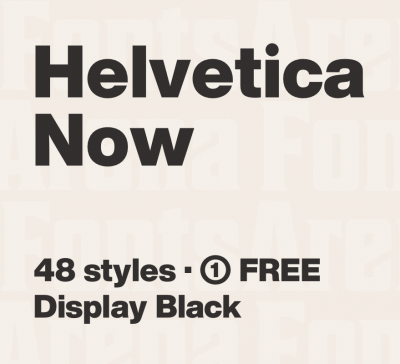

In [3]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

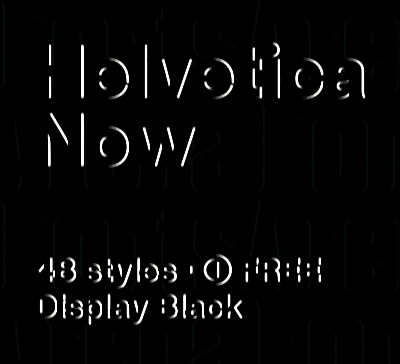

In [5]:
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)


**Horizontal Edge Detector** 

An edge is detected when there is a change in intensity between neighboring cells.So a first order derivative can be used to detect this change in intensity.Some of the common first order derivative edge detectors are :


Sobel| Operator |
:---:|:---:|:---:
-1|-2|-1
0|0|0
1| 2|1


Prewitt| Operator |
:---:|:---:|:---:
-1|-1|-1
0|0|0
1| 1|1


Here I will use Sobel operator to detect horizontal edge in the image.I observed a pattern in horizontal edge detection by Sobel operator in this particular case , probably because the image is 3 dimensional.

If I apply the Sobel operator

Sobel| Operator |
:---:|:---:|:---:
1|2|1
0|0|0
-1| -2|-1


on the image , then it detects the upper horizontal edges and when I apply the Sobel operator

Sobel| Operator |
:---:|:---:|:---:
-1|-2|-1
0|0|0
1| 2|1


on the image , then it detects the lower horizontal edges

So to get both the horizontal edges (upper and lower) , I am adding the result of both filters to show the final image.


**Original image**


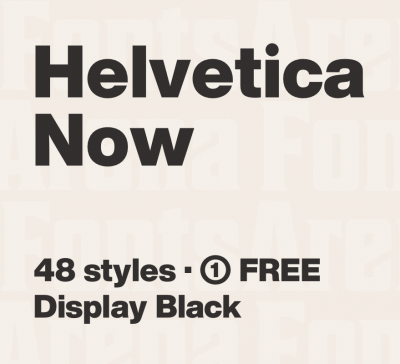

**Upper horizontal edge image **


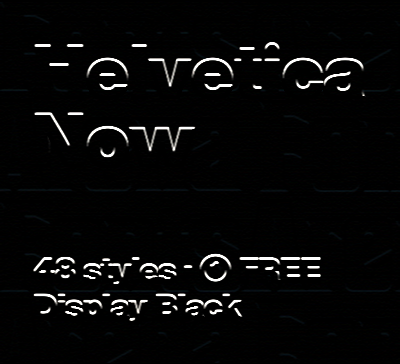

In [0]:
horizontalKernel1 = np.float32([[1,2,1],[0,0,0],[-1,-2,-1]])
horizontalKernel2 = np.float32([[-1,-2,-1],[0,0,0],[1,2,1]])

horizontalEdge1 = cv2.filter2D(image,-1,horizontalKernel1)
horizontalEdge2 = cv2.filter2D(image,-1,horizontalKernel2)


print("**Original image**")

cv2_imshow(image)

print("**Upper horizontal edge image **") 

cv2_imshow(horizontalEdge1 )



*The above image shows horizontal edges detected on the upper part*

**Original image**


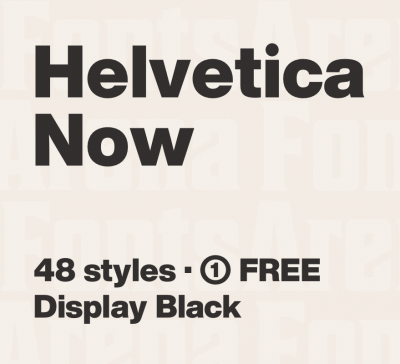

**Lower horizontal edge image **


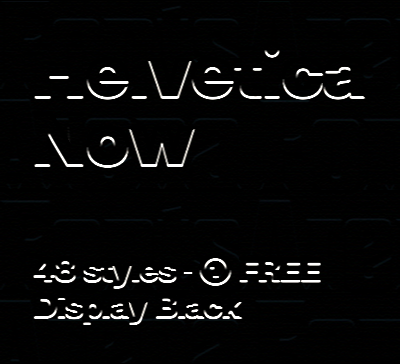

In [0]:
print("**Original image**")

cv2_imshow(image)

print("**Lower horizontal edge image **") 

cv2_imshow(horizontalEdge2)

*The above image shows horizontal edges detected on the lower part*

**Original image**


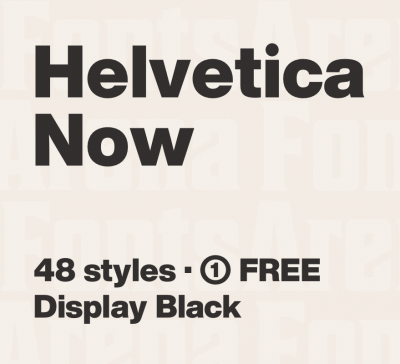

**Both upper and lower horizontal edge image **


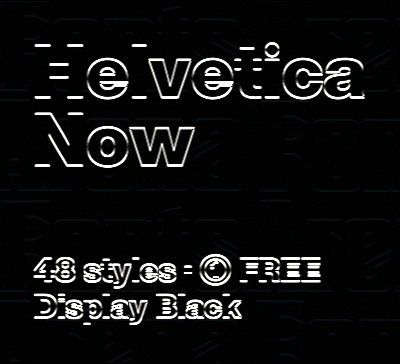

In [0]:
print("**Original image**")

cv2_imshow(image)

print("**Both upper and lower horizontal edge image **") 


cv2_imshow(horizontalEdge1 + horizontalEdge2)

*The above image shows horizontal edges detected on both upper and lower part*

**45 Degree Angle Detector (either)**

We can use the the following kernel to detect 45 degree edge 
 
 45 Degree| kernel |
:---:|:---:|:---:
2|-1|-1
-1 |2|-1
-1|-1|2

The diagonal elements are given higher weight to emphasize on the 45 degree intensity.


**Original image**


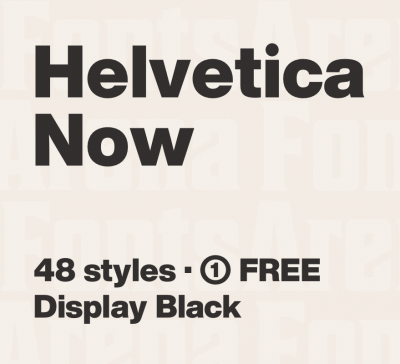

**45 degree edge image **


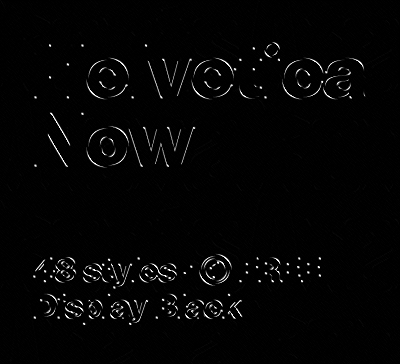

In [6]:
fortyfiveDegreeKernel1 = np.float32([[2,-1,-1], [-1,2,-1], [-1,-1,2]])

fortyfiveDegreeEdge1 = cv2.filter2D(image[:,:,0],-1,fortyfiveDegreeKernel1)

print("**Original image**")

cv2_imshow(image)

print("**45 degree edge image **") 

cv2_imshow(fortyfiveDegreeEdge1)



**Blur Kernel**

A Box blur kernel can be used to blur the image


Box| kernel |
:---:|:---:|:---:
1/9|1/9|1/9
1/9|1/9|1/9
1/9|1/9|1/9

What the above kernel does is , the intensity of each cell is reduced to 1/9 to blur the image.


**Original image**


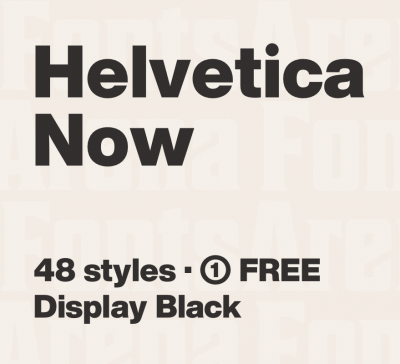

**Blurred image **


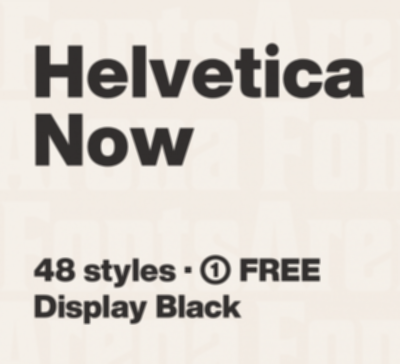

In [0]:
blurKernel = np.float32([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])

blurImage = cv2.filter2D(image,-1,blurKernel)

print("**Original image**")

cv2_imshow(image)

print("**Blurred image **") 

cv2_imshow(blurImage)

**Sharpen Kernel**

To sharpen an image, we have to highlight fine details in an image , so we use a Laplacian operator.Laplacian operator is a second order derivative. We take the first order derivative to detect the gradient between the point and the neighborhood , and then we take the second order derivative to detect the peak or valley in the image. e.g we have a scan line with the following intensity.


scaned line x coordinate|	1	|2	|3	|4	|5	|6	|7	|8	|9	|10
:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:
Intensity|5|5|5|4|3	|2	|4	|5	|5	|7
first order derivative|	0|	0	|0	|-1|	-1	|-1|	2|	1|	0|	2
second order derivative|0 	|	0|	0|	-1|	0|	0|	3|	-1|	-1|	2
Capture 	||||			valley	|||		peak|	valley	|valley|	peak

The above table illustrates the first order drivative and second order derivative of the intenstity of scanned line.

The laplacian kernel  which is the second order derivate is capturing the peaks and valley in the intensity.

Laplacian| kernel |
:---:|:---:|:---:
0|-1|0
-1|4|-1
0|-1|0

, but ignoring the background.The original image kernel is 

Original | Image | kernel
 :---:|:---:|:---:
 0|0|0
 0|1|0
 0|0|0

So to get the background back , the original image kernel is added back.The resulting kernel is 

  Resulting| kernel |
 :---:|:---:|:---:
 0|-1|0
-1|5|-1
0|-1|0

I will use the resulting kernel to get the sharpened image

**Original image**


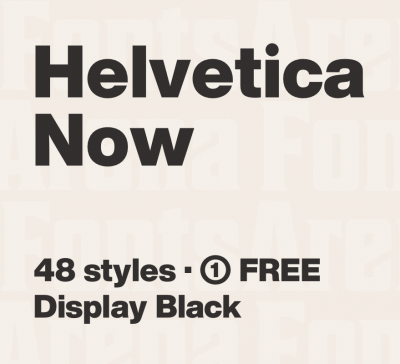

**Sharpened image **


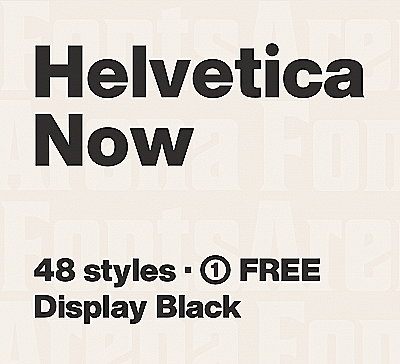

In [0]:
sharpenKernel = np.float32([[0,-1,0],[-1,5,-1],[0,-1,0]])

sharpenedImage = cv2.filter2D(image,-1,sharpenKernel)

print("**Original image**")

cv2_imshow(image)

print("**Sharpened image **") 

cv2_imshow(sharpenedImage)

In similar line I will use another kernel to get the sharpened image

Resulting| kernel |
:---:|:---:|:---:
-1|-1|-1
-1|9|-1
-1|-1|-1



**Original image**


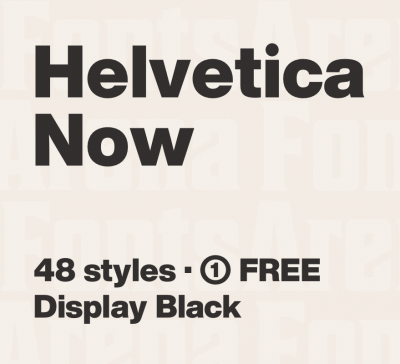

**Sharpened image**


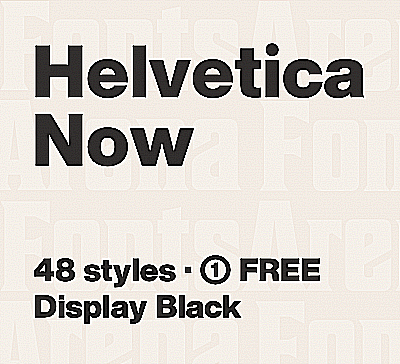

In [0]:
sharpenKernel9 = np.float32([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])

sharpenedImage9 = cv2.filter2D(image,-1,sharpenKernel9)

print("**Original image**")

cv2_imshow(image)

print("**Sharpened image**") 

cv2_imshow(sharpenedImage9)

The image can be further sharpened by using a **High Boost filter** , the way it works is in the previous case 


*   We sharpened the image by 

Resultant Kernel = Original image kernel +/- Laplacian Kernel 
*   In the high boost filter 

Resultant Kernel =  (Constant >= 1 ) x (Original image kernel ) +/-  Laplacian Kernel 

so if we use a Constant = 3 , then the Original image kernel will be

Boosted | Image | kernel
 :---:|:---:|:---:
 0|0|0
 0|3|0
 0|0|0

and if the Laplacian kernel is 

Laplacian| kernel |
:---:|:---:|:---:
-1|-1|-1
-1|8|-1
-1|-1|-1

Then the resulting kernel will be 

Resulting| kernel |
:---:|:---:|:---:
-1|-1|-1
-1|11|-1
-1|-1|-1



**Original image**


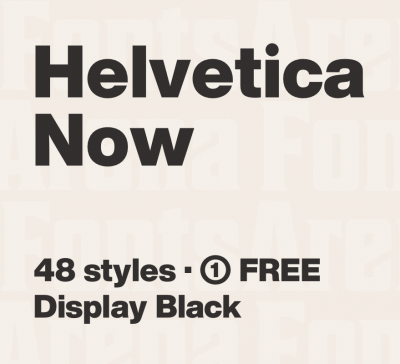

**Sharpened image**


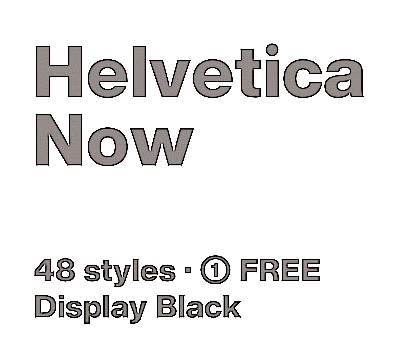

In [0]:
sharpenKernel11 = np.float32([[-1,-1,-1],[-1,11,-1],[-1,-1,-1]])

sharpenedImage11 = cv2.filter2D(image,-1,sharpenKernel11)

print("**Original image**")

cv2_imshow(image)

print("**Sharpened image**") 

cv2_imshow(sharpenedImage11)




**Identity function**

Identity| kernel |
:---:|:---:|:---:
0|0|0
0|1|0
0|0|0


If we use a kernel where the central coefficient is 1 and all the neighboring coefficients are 0 , then the result of convolving using the above kernel will be the same as the original image.



**Original image**


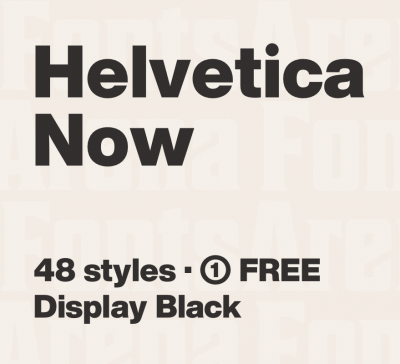

**Convoluted image**


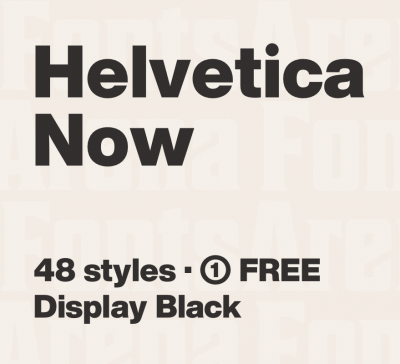

In [0]:
identityKernel = np.float32([[0,0,0], [0,1,0], [0,0,0]])

identiticalImage = cv2.filter2D(image,-1,identityKernel)


print("**Original image**")

cv2_imshow(image)

print("**Convoluted image**") 

cv2_imshow(identiticalImage)



In [0]:
cv2.destroyAllWindows()

In [0]:
#im = np.float32( [[3,4,5,6,255,3,4,5,6,7],[7,5,4,3,255,3,4,5,6,7],[255,255,255,255,255,255,255,255,255,255],[8,4,5,3,255,3,4,5,6,7],[6,5,4,7,255,2,4,5,6,7],[3,4,5,6,255,3,4,5,6,7],[7,5,4,3,255,3,4,5,6,7],[255,255,255,255,255,255,255,255,255,255],[8,4,5,3,255,3,4,5,6,7],[6,5,4,7,255,3,4,5,6,7]])
#im = np.float32( [[0,0,0,0,255,0,0,0,0,0],[0,0,0,0,255,0,0,0,0,0],[255,255,255,255,255,255,255,255,255,255],[0,0,0,0,255,0,0,0,0,0],[0,0,0,0,255,0,0,0,0,0],[0,0,0,0,255,0,0,0,0,0],[0,0,0,0,255,0,0,0,0,0],[255,255,255,255,255,255,255,255,255,255],[0,0,0,0,255,0,0,0,0,0],[0,0,0,0,255,0,0,0,0,0]])
#im = np.float32( [[0,0,0,0,25,0,0,0,0,0],[0,0,0,0,25,0,0,0,0,0],[25,25,25,25,25,25,25,25,25,25],[0,0,0,0,25,0,0,0,0,0],[0,0,0,0,25,0,0,0,0,0],[0,0,0,0,25,0,0,0,0,0],[0,0,0,0,25,0,0,0,0,0],[25,25,25,25,25,25,25,25,25,25],[0,0,0,0,25,0,0,0,0,0],[0,0,0,0,25,0,0,0,0,0]])

#hk = np.float32( [[-1,-1,-1],[0,0,0],[1,1,1]])
#hor = cv2.filter2D(im,-1,hk)
#cv2_imshow(im)
#cv2_imshow(hor)
#print(hor)